# Definition

## Project Overview

This project is a Kaggle challenge launched on Oct. 20, 2017. Here is the website of the competition: https://www.kaggle.com/c/favorita-grocery-sales-forecasting.   

Sales forecasting estimates future sales, which helps to make business decisions, such as planning stocking amount, allocating resources, predicting sales revenue, managing cash flow, and so on. In retail industry, especially grocery retail industry, sales forecasting is critical, as they may get stuck with perishable goods if overstocked, or lose custormers if understocked. Corporación Favorita, a large Ecuadorian-based grocery retailer, owns 54 stores in different cities/regions in Ecuador. It has this challenge on Kaggle in order to have a better prediction of  product sales.  

As a research topic, sales forecasting has been studied for a long time. The forecasts are often based on past sales data, industry-wide comparisons, and economic trends. (ref: https://trackmaven.com/marketing-dictionary/sales-forecasting/) Gnerally speaking, methods of forecasting can be classified into three categories: qualitative techniques, time series analysis and projection, and causal models (ref: https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique) The first depends on qualitative data, like expert opinion, where past information may or may not be taken into consideration. The second focuses me merely on historical data. It explores patterns and pattern changes to predict future sales. The third uses highly refined and specific information about relationships between system elements.  

In this grocery sales forecasting problem, historical datasets are provided. From the perspecitve of machine learning, I tackled the problem with a supervised regression method, model product unit sales with a parametric method.
 
The Kaggle competition saves a testing data from public, where true target values are hidden. The trained model is applied to this testing data set to generate prediction of grocery sales, and results are then submitted to Kaggle for evaluation.

## Problem Statement

The task **T** of this challenge is to forecast product sales of a specific item in a specific store for some given dates. In this project, experience **E**, historical datasets, are provided to tackle this problem: sale records from Jan.1 2013 to Aug.16 2017, along with some other historical data, such as oil price, transaction, etc. Evaluation metric **P** is Normalized Weighted Root Mean Squared Logarithmic Error (NERMSLE).
Based on historical sales records and related factors **E**, a supervised machine learning method can be employed to perform task **T** -- predict product sales, mesured with metric **P**.  

## Metrics

Evaluation metric for the challenge is provided here https://www.kaggle.com/c/favorita-grocery-sales-forecasting#evaluation.

To be specific, the prediction is evalueated on the Normalized Weighted Root Mean Squared Logarithmic Error (NERMSLE):  
$\sqrt{\frac{\sum_{i=1}^{n}w_{i}(ln(\hat{y}_{i}+1)-ln(y_{i}+1))^2}{\sum_{i=1}^{n}w_{i}}}$,  
where for row $i$, $\hat{y}_i$ is thepredicted unit_sales of an item and $y_{i}$ is the actual unit_sales; $n$ is the total number of rows in the test set. $w_{i}$, the weights is given based on if an item is perishable or not: Perishable items have a weight of 1.25 and all other items have weights of 1.00.

This metric is able to avoid penalizing large differences when both the predicted and true numbers are large and it works well to predict values across a large range of orders of magnitudes.

# Analysis

## Data Exploration

Datasets are provided by Corporación Favorita: https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data .

### Data overview

An overview of datasets and relationship is shown below:
![title](./pics/data_relation.png)

5 data files have date, but with different ranges.  

data file | starting date | ending date
---|--- |---
train.csv|2013-01-02|2017-08-15
test.csv|2017-08-16|2017-08-31
transactions.csv|2013-01-01|2017-08-15
oil.csv|2013-01-01|2017-08-31
holidays_events.csv|2012-03-02|2017-12-26

The date of oil.csv covers the date of test.csv, which is an improper data leakage, as the oil price is hard to achive for a future date.


### Data information
1.train.csv  
    - id: This is meaningless for model training, and will be dropped
    - date: From 2013-01-01 to 2017-08-15
    - store_nbr: conintunous integer from 1 to 54
    - item_nbr: item id, un-continuous integers
    - unit_sale: continuous float number with min=-0.000153 max=89440
    - onpromotion: bool 0 1, and missing entries  
    
column|date|id|stor_nbr|item_nbr|unit_sales|onpromotion
---|---|---|---|---|---|---
datatype|int32|date|int16|int32|float32|float32
    
2.holidays_events.csv  
    - date: 312 unique dates from 2012-03-02 to 2017-12-26  
    - type: ['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event']  
    - locale: ['Local', 'Regional', 'National']  
    - locale_name: ['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo','Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo','El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato', 'Ibarra','Quevedo', 'Santo Domingo de los Tsachilas', 'Santa Elena', 'Quito','Loja', 'Salinas', 'Guayaquil']  
    - description:103 entries (don't understand)  
    - transferred: [False, True]  



column|date|type|locale|locale_name|description|transferred
---|---|---|---|---|---|---
datatype|date|string|string|string|string|bool

3.stores.csv  
    - store_nbr: integer from 1 to 54
    - city: ['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen']
    - state: ['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi', 'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro', 'Esmeraldas', 'Manabi']
    - type: ['D', 'B', 'C', 'E', 'A']
    - cluster: [13, 8, 9, 4, 6, 15, 7, 3, 12, 16, 1, 10, 2, 5, 11, 14, 17]
    
column|store_nbr|city|state|type|cluster
---|---|---|---|---|---
datatype|int64|string|string|string|int64   
    
4.oil.csv  
    - date: from 2013-01-01 to 2017-08-31  
    - dcoilwtico: continuous value from 26.19~110.62
    
column| date | dcoilwtico  
---|---|---
datatype| date| float64

5.transactions.csv  
    - date: from 2013-01-01 to 2017-08-15
    - store_nbr: 54 store numbers
    - transactions: integers between 5 and 8358
Transactions data in testing set is not provided, so this dataset will not be used in training, although transactions are highly related to unit sales we want to predict.  

6.items  
    - item_nbr: 4100 discrete values
    - family: ['GROCERY I' 'CLEANING' 'BREAD/BAKERY' 'DELI' 'POULTRY' 'EGGS' 'PERSONAL CARE' 'LINGERIE' 'BEVERAGES' 'AUTOMOTIVE' 'DAIRY' 'GROCERY II' 'MEATS' 'FROZEN FOODS' 'HOME APPLIANCES' 'SEAFOOD' 'PREPARED FOODS' 'LIQUOR,WINE,BEER' 'BEAUTY' 'HARDWARE' 'LAWN AND GARDEN' 'PRODUCE' 'HOME AND KITCHEN II' 'HOME AND KITCHEN I' 'MAGAZINES' 'HOME CARE' 'PET SUPPLIES' 'BABY CARE' 'SCHOOL AND OFFICE SUPPLIES' 'PLAYERS AND ELECTRONICS' 'CELEBRATION' 'LADIESWEAR' 'BOOKS']
    - class: 337 discrete values
    - perishable: 0 and 1  
    
column|item_nbr|family|class|perishable
---|---|---|---|---
datatype|int64|string|int64|int64

## Exploratory Visualization

### Transactions
From the figure below we can see that the transactions data have is yearly periodic.It has the highest peak at the end of a year and some ups and downs in the middle of the year. 

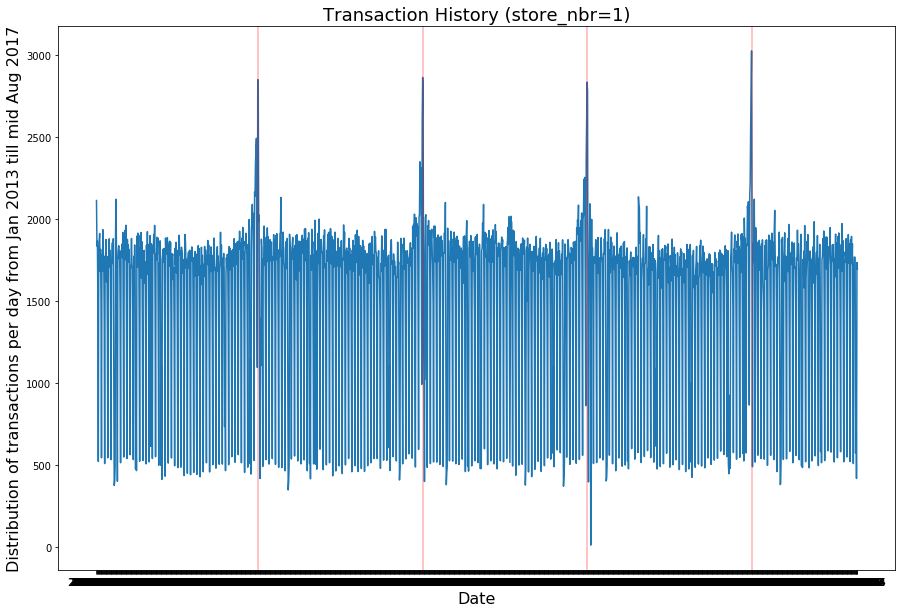

In [1]:
import visuals as vs
import os.path
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py

store = 1
transactions = pd.read_csv("input/transactions.csv")
fig=plt.figure(figsize=(15,10))
plt.plot(transactions[transactions['store_nbr']==store].date.values, transactions[transactions['store_nbr']==store].transactions.values)
plt.axvline(x='2013-12-23', color='red', alpha=0.3)
plt.axvline(x='2014-12-23', color='red', alpha=0.3)
plt.axvline(x='2015-12-23', color='red', alpha=0.3)
plt.axvline(x='2016-12-23', color='red', alpha=0.3)
plt.ylabel('Distribution of transactions per day from Jan 2013 till mid Aug 2017' , fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.title('Transaction History (store_nbr=%s)'%(store), fontsize=18)


################################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Since the range of transactions in a store is wide, np.log1p is applied to transform the transaction data.

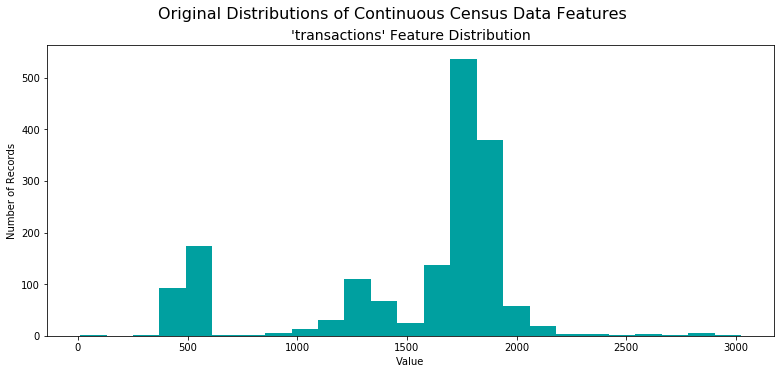

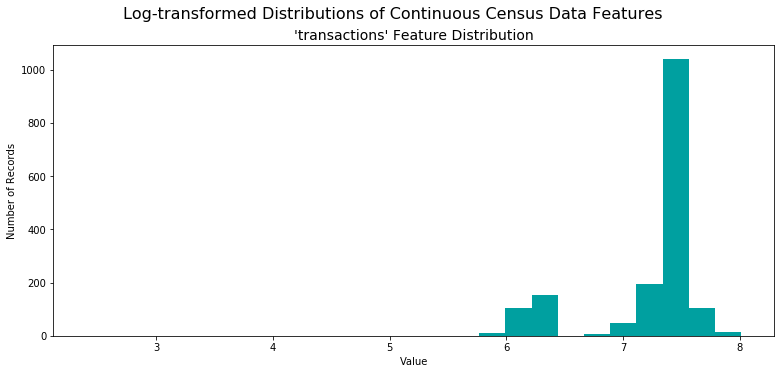

In [2]:
import visuals as vs

vs.distribution(transactions[transactions['store_nbr']==store])
transactions['transactions'] = transactions['transactions'].apply(np.log1p)
vs.distribution(transactions[transactions['store_nbr']==store], transformed=True)
################################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Oil
There is a big drop off of oil price from Oct.2014 to Mar.2015. The oil price stablizes around 45 since the middle of 2016.

In [3]:
oil = pd.read_csv("input/oil.csv")
# print("Oil has {} data points with {} variables each.".format(*oil.shape))
py.init_notebook_mode(connected=True)

trace = go.Scatter(name='Oil prices', x=oil['date'], y=oil['dcoilwtico'], 
                   mode='lines', line=dict(color='rgb(20, 15, 200, 0.8)'), 
                   fillcolor='rgba(0,0, 216, 0.3)', fill='tonexty')
data = go.Data([trace])
layout = go.Layout(yaxis=dict(title='Daily Oil price'), 
                  title='Daily oil prices from Jan 2013 till Auguest 2017',
                  showlegend = False )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-time-series-error-bars')

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


### Items
There are 4100 items totally of 17 families and 337 classes.

In [4]:
items = pd.read_csv("input/items.csv")
trace2 = go.Bar(
    y=items.family.value_counts().values, 
    x=items.family.value_counts().index, 
    marker=dict(
        color=items.family.value_counts().values, 
        colorscale='Portland', 
        reversescale = False), 
    orientation='v',)

data = go.Data([trace2])
layout = dict(title='Counts of items per family category', 
              width = 800, height=800, 
              yaxis = dict(showgrid=False, showline=False, showticklabels=True,))

fig1=go.Figure(data=data, layout=layout)
py.iplot(fig1, filename='plots')

################################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Algorithms and Techniques

The training dataset is large: 125,497,040 items across 4 years and 8 months. By setting proper datatypes of columns in Pandas function read_cvs, original 6 GB training data can be reduced to 4GB, which is still very large.  
Since the sales of stores are independent, I firstly split data for different stores, and train models for each store. **All following experiments and analysis are based on Store_nbr = 1**  

The regressor is Decision Tree Regressor

The following parameters can be tuned to optimize the regressor:  
1. max_depth

2. Trim the training data to a proper length

3. Principal component analysis to reduce dimensionality

4. Use FBProphet to predict future transactions of each store

## Benchmark

A naive model is to predict unit_sale based on historical values. This non-parametric model is an unweighted average of the historical values of the same item in the same store from the same date of previous 4 years. Unit_sales of items that can not be found in history record are filled with 0.  
Evaluation from Kaggle website shows prediction from this method scors 0.908 (https://www.kaggle.com/c/favorita-grocery-sales-forecasting/submissions?sortBy=date&group=all&page=1)


# Methodology

## Data Preprocessing


Competitions on Kaggle provide a testing dataset with target values hidden from public. Sometimes, some features appears only in training data, while some only in testing data. To avoid extra troubles caused by features only belongs to either training data or testing data, I combine training data and testing data together to perform data preprocessing, and split them when data preprocessing is completed.

The preprocessing of data includes these steps:
1. Use FBProphet to predict transactions of future date in test.csv. Holiday_events, and payoff dates are taken into considerations, as they are important factors affecting transactions. Since some hodilays and events are regional or local, location of a store is used to filter holidays and events for that specific store.
2. Data merging
    Merge training data with item.csv
    Merge training and testing data with transactions for each date of every store
3. One-hot-encode categorical features: 'item_nbr', 'family', 'class'
4. PCA
    After one-hot-encoding, every traing sample has more than 4000 features, so PCA is used reduce dimentionality. Since only train.csv has targets, i.e. unit_sales. The PCA model is trained on training data only, and also applied on testing data.

## Implementation

The implementaton can be splitted into two stages:
1. The prediction of transactions with FBProphet
2. Regression model tuning

### Transaction prediction
With FaceBook Prophet, future transactions can be predicted. Since holidays are location related, the store is firstly located. Holidays within the related locations are filtered and applied in Prophet. Together with historical transactions data, transactions in dates of testing data are predicted.  
Plots below shows trends of transactions.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


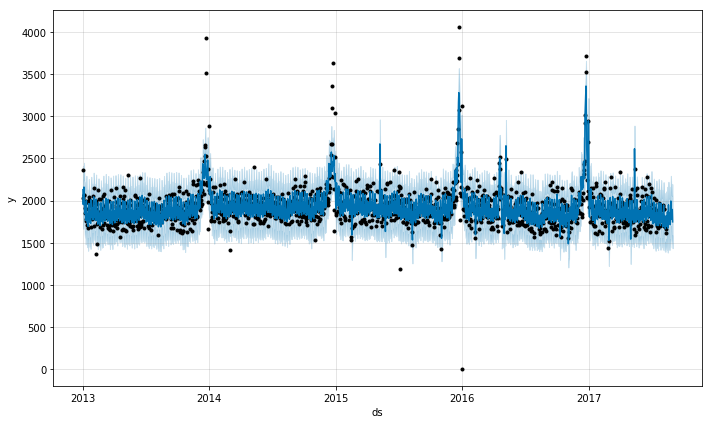

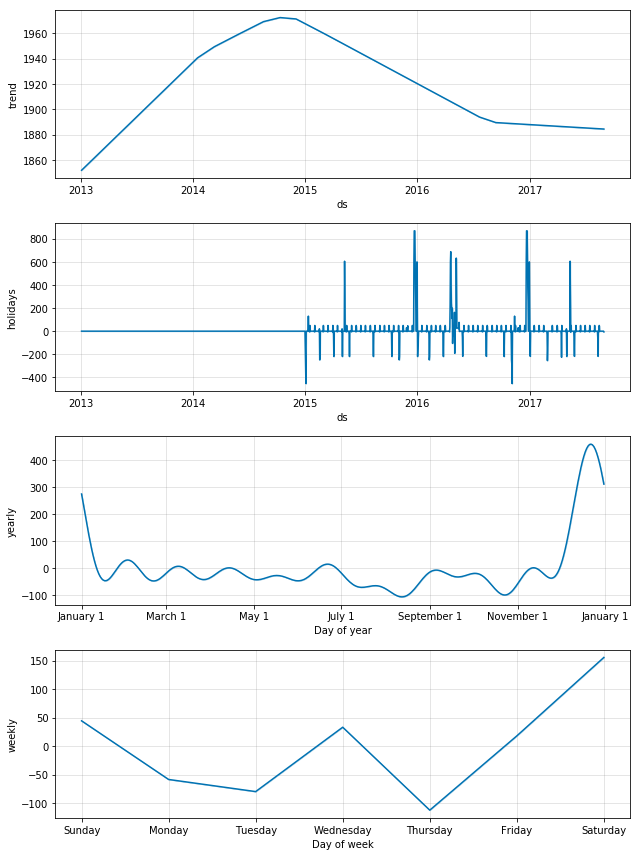

In [5]:
from fbprophet import Prophet
import calendar
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import datetime as dt


def store_loc_search(store):
    location = {}
    
    stores_raw = pd.read_csv('input/stores.csv')
    location['city'] = stores_raw.loc[stores_raw['store_nbr']==store, 'city'].values[0]
    location['state'] = stores_raw.loc[stores_raw['store_nbr']==store, 'state'].values[0]
    return location

def holidays(store):
    #holidays_events happens at the region of a store
    city,state = store_loc_search(store)
    holidays_events_raw = pd.read_csv('input/holidays_events.csv', parse_dates=['date'])
    mask = (holidays_events_raw['date'] >= '2015-01-01') & (holidays_events_raw['transferred'] == False)&(
        ((holidays_events_raw['locale']=='Local')&(holidays_events_raw['locale_name']==city))|
        ((holidays_events_raw['locale']=='Reginal')&(holidays_events_raw['locale_name']==state))|
        (holidays_events_raw['locale']=='National')
    )
    holidays_events = pd.DataFrame({
        'holiday':holidays_events_raw[mask]['type'],
        'ds':holidays_events_raw[mask]['date'],
        'lower_window':0,
        'upper_window':1,
    })
    
    #payoff days: Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month.
    payoff_dates = []
    for year in range(2015, 2018):
        for month in range(1,13):
            payoff_dates.append(str(year)+'-'+str(month)+'-15')
            payoff_dates.append(str(year)+'-'+str(month)+'-'+str(calendar.monthrange(year,month)[1]))
    payoffs = pd.DataFrame({
      'holiday': 'playoff',
      'ds': pd.to_datetime(payoff_dates),
      'lower_window': 0,
      'upper_window': 1,
    })
    
    earthquake = pd.DataFrame({
      'holiday': 'earthquake',
      'ds': pd.to_datetime(['2016-04-16']),
      'lower_window': 0,
      'upper_window': 15,
    })
    
    #Put holiday_events and payoff_dates together
    holidays = pd.concat((holidays_events, payoffs, earthquake)).fillna(0).sort_values(['ds'])
    return holidays

def transactions(store):
    transactions_raw = pd.read_csv('input/transactions.csv', parse_dates = ['date'])
    transactions = transactions_raw.loc[transactions_raw['store_nbr']==store].copy()
    transactions.drop(['store_nbr'], axis=1, inplace=True)
    transactions.loc[transactions.transactions <= 0, 'transactions'] = None
    transactions = transactions.rename(columns={'date': 'ds','transactions': 'y'})
    return transactions

def predict_transactions(store):
    prophet_model = Prophet(holidays=holidays(store), interval_width=0.95)
#     prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=4)
    transactions_store = transactions(store)
    prophet_model.fit(transactions_store)
    future = prophet_model.make_future_dataframe(periods=16, freq='d')
    future['floor'] = 0
    forecast = prophet_model.predict(future)
    forecost_plot = prophet_model.plot(forecast, uncertainty=True)
    component_plot = prophet_model.plot_components(forecast)

    transaction_pred = forecast.loc[forecast['ds']>='2017-08-16',['ds', 'yhat']]
    transaction_pred = transaction_pred.rename(columns={'ds': 'date', 'yhat': 'transactions'})
    return transaction_pred
predict_transactions(2)

################################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### PCA
After one-hot-encoding, each sample has more than 4000 features. To reduce dimensionality, PCA is performed. Based on the cumulated explained_variance_ratio, the number of PCA components is trimmed at 1000, where more than 80% of explained_variance_ratio is captured.

![title](./pics/pca_explained_variance.png)

### Regression Model

In this project, I use Extreme Gradient Boosting (XGBoost) Regression, which is very popular to many Kaggle competition winners recently.  
XGBoost is used for supervised learning problems. It is a tree-based regressor consisted of tree ensemble and tree boosting.

## Refinement

RandomizedSearchCV is employed to search for an optimal parameter set.

# Results

## Model Evaluation and Validation

## Justification

# Conclusion